In [ ]:
! pip install --upgrade scikit-learn

# Book Crossing - Classification

In [1]:
%matplotlib inline

import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set()
palette = sns.color_palette("icefire")

plt.style.use('ggplot')

sns.set_context("talk")

In [2]:
dataset = pd.read_csv('book_crossing.classification.cleaned.csv')

In [3]:
dataset['age'] = dataset['age'].astype(np.float64)
dataset['book_rating'] = dataset['book_rating'].astype('category')
dataset['book_title'] = dataset['book_title'].astype('category')
dataset['book_author'] = dataset['book_author'].astype('category')
dataset['year_of_publication'] = dataset['year_of_publication'].astype(np.float64)
dataset['publisher'] = dataset['publisher'].astype('category')
dataset['country'] = dataset['country'].astype('category')

In [4]:
dataset.head()

,age,book_rating,book_title,book_author,year_of_publication,publisher,country
0,34.0,mid,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
1,30.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
2,34.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
3,34.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
4,34.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364570 entries, 0 to 364569
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  364570 non-null  float64 
 1   book_rating          364570 non-null  category
 2   book_title           364570 non-null  category
 3   book_author          364570 non-null  category
 4   year_of_publication  364570 non-null  float64 
 5   publisher            364570 non-null  category
 6   country              364570 non-null  category
dtypes: category(5), float64(2)
memory usage: 19.1 MB


In [6]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

set_config(display='diagram')

In [7]:
X, y = dataset.drop('book_rating', axis=1), dataset['book_rating']

In [8]:
target_names = ['low', 'mid', 'high']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364570 entries, 0 to 364569
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  364570 non-null  float64 
 1   book_title           364570 non-null  category
 2   book_author          364570 non-null  category
 3   year_of_publication  364570 non-null  float64 
 4   publisher            364570 non-null  category
 5   country              364570 non-null  category
dtypes: category(4), float64(2)
memory usage: 18.8 MB


In [10]:
X.head()

,age,book_title,book_author,year_of_publication,publisher,country
0,34.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
1,30.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
2,34.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
3,34.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
4,34.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada


In [11]:
y.head()

0     mid
1    high
2    high
3    high
4    high
Name: book_rating, dtype: category
Categories (3, object): ['high', 'low', 'mid']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
numeric_features = ['age', 'year_of_publication']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [14]:
categorical_features = ['book_title', 'book_author', 'publisher', 'country']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [24]:
dummy = preprocessor.fit_transform(X_train)
dummy.shape

(291656, 177473)

If we were to store all the all data, and each cell occupying 4 bytes, this is how much space we would require

In [30]:
f'{(dummy.shape[0] * dummy.shape[1] * 4) // 1024 // 1024 // 1024} giga bytes'

'192 giga bytes'

## Supervised Models

- DecisionTreeClassifier
- SVC
- LinearSVC
- KNeighborsClassifier
- PassiveAggressiveClassifier
- AdaBoostClassifier
- GaussianProcessClassifier



In [16]:
from time import time

def fit_model(algorithm, data, preprocessor):

    t1 = time()

    X_train, X_test, y_train, y_test = data

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', algorithm)])
    
    print(f'\nStarted Training {algorithm.__class__.__name__} on X_train: {X_train.shape} y_train: {y_train.shape}')
    
    # train the model
    clf.fit(X_train, y_train)

    print(f"\nEvaluating model on X_test: {X_test.shape} y_test: {y_test.shape}")

    # test the model
    y_true = y_test.copy()
    y_pred = clf.predict(X_test)

    # get the classification report
    print(f"\nClassification Report for {algorithm.__class__.__name__}")
    print(classification_report(y_true, y_pred, target_names=target_names, labels=target_names))

    acc_score = accuracy_score(y_true, y_pred)
    bal_score = balanced_accuracy_score(y_true, y_pred)
    
    print(f"\nAccuracy Score: {acc_score}")
    print(f"Balanced Accuracy Score: {bal_score}")

    print()
    # show the confusion matrix
    cmmat_table = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    conmat = pd.crosstab(cmmat_table.y_true, cmmat_table.y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')
    ax = plt.axes()
    sns.set(rc={'figure.figsize':(9, 7)})
    sns.heatmap(conmat, annot=True, ax=ax)
    ax.set_title(f'{algorithm.__class__.__name__}')
    plt.show()
    print()

    t2 = time()

    print(f'Trained {algorithm.__class__.__name__} in {(t2 - t1)}s')

    return clf
    

## DecisionTree Classifier

In [33]:
dtc = DecisionTreeClassifier(max_depth=100)


Started Training DecisionTreeClassifier on X_train: (291656, 6) y_train: (291656,)

Evaluating model on X_test: (72914, 6) y_test: (72914,)

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

         low       0.19      0.03      0.05      1603
         mid       0.55      0.17      0.25     28483
        high       0.61      0.91      0.73     42828

    accuracy                           0.60     72914
   macro avg       0.45      0.37      0.35     72914
weighted avg       0.58      0.60      0.53     72914


Accuracy Score: 0.6010368379186439
Balanced Accuracy Score: 0.36884514138535285



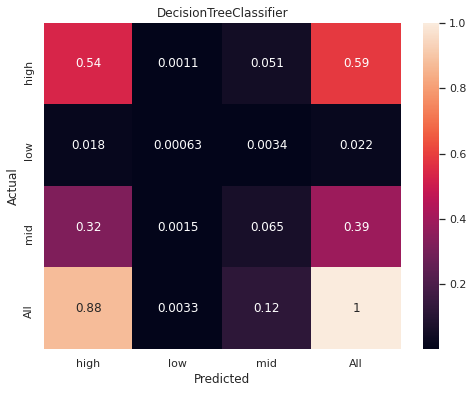


Trained DecisionTreeClassifier in 146.20573687553406s


In [34]:
clf = fit_model(algorithm=dtc, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [35]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier', DecisionTreeClassifier(max_depth=100))])

## SVC (Support Vector Classification)

In [31]:
svc = SVC(gamma='auto', C=1.0, kernel='rbf')

In [ ]:
clf = fit_model(algorithm=svc, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)


Started Training SVC on X_train: (291656, 6) y_train: (291656,)


In [ ]:
clf

## Passive Aggressive Classifier

In [17]:
pac = PassiveAggressiveClassifier(early_stopping=True, verbose=1, n_jobs=-1)


Started Training PassiveAggressiveClassifier on X_train: (291656, 6) y_train: (291656,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


-- Epoch 1-- Epoch 1

Norm: 46.21, NNZs: 53157, Bias: -0.504273, T: 262490, Avg. loss: 0.105049
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 119.01, NNZs: 149844, Bias: 0.084396, T: 262490, Avg. loss: 0.905595
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 66.08, NNZs: 70363, Bias: -0.521754, T: 524980, Avg. loss: 0.086252
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 164.90, NNZs: 161910, Bias: 0.072078, T: 524980, Avg. loss: 0.789480
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 79.79, NNZs: 79611, Bias: -0.583871, T: 787470, Avg. loss: 0.077301
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 198.89, NNZs: 164254, Bias: 0.097328, T: 787470, Avg. loss: 0.731145
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 90.21, NNZs: 85297, Bias: -0.646251, T: 1049960, Avg. loss: 0.072339
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 225.85, NNZs: 164894, Bias: 0.119736, T: 1049960, Avg. loss: 0.696331
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 98.61,

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished



Evaluating model on X_test: (72914, 6) y_test: (72914,)

Classification Report for PassiveAggressiveClassifier
              precision    recall  f1-score   support

         low       0.04      0.09      0.05      1603
         mid       0.47      0.29      0.36     28483
        high       0.62      0.75      0.68     42828

    accuracy                           0.55     72914
   macro avg       0.38      0.37      0.36     72914
weighted avg       0.55      0.55      0.54     72914


Accuracy Score: 0.5531722302987081
Balanced Accuracy Score: 0.37477427261674867



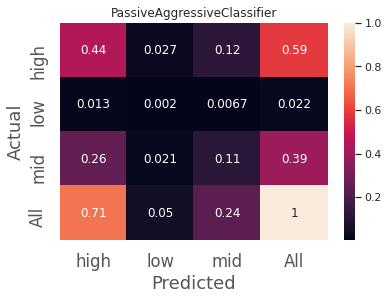


Trained PassiveAggressiveClassifier in 8.378920316696167s


In [20]:
clf = fit_model(algorithm=pac, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [21]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1,
                                             verbose=1))])

## Ridge Classifier

In [26]:
rc = RidgeClassifier(tol=1e-2, solver="auto")


Started Training RidgeClassifier on X_train: (291656, 6) y_train: (291656,)

Evaluating model on X_test: (72914, 6) y_test: (72914,)

Classification Report for RidgeClassifier
              precision    recall  f1-score   support

         low       0.06      0.01      0.02      1603
         mid       0.49      0.35      0.41     28483
        high       0.63      0.77      0.69     42828

    accuracy                           0.59     72914
   macro avg       0.39      0.38      0.37     72914
weighted avg       0.56      0.59      0.57     72914


Accuracy Score: 0.5888855363853307
Balanced Accuracy Score: 0.3765274882659582



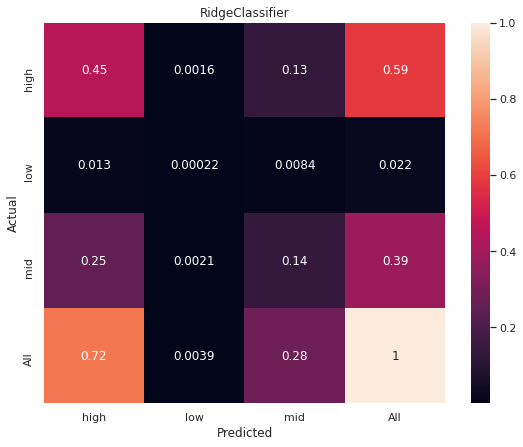


Trained RidgeClassifier in 22.259966611862183s


In [27]:
clf = fit_model(algorithm=rc, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [28]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier', RidgeClassifier(tol=0.01))])

## AdaBoost Classifier

In [29]:
abc = AdaBoostClassifier()


Started Training AdaBoostClassifier on X_train: (291656, 6) y_train: (291656,)

Evaluating model on X_test: (72914, 6) y_test: (72914,)

Classification Report for AdaBoostClassifier
              precision    recall  f1-score   support

         low       0.40      0.01      0.02      1603
         mid       0.55      0.05      0.09     28483
        high       0.59      0.97      0.74     42828

    accuracy                           0.59     72914
   macro avg       0.51      0.34      0.28     72914
weighted avg       0.57      0.59      0.47     72914


Accuracy Score: 0.5919165043750172
Balanced Accuracy Score: 0.34478823998711056



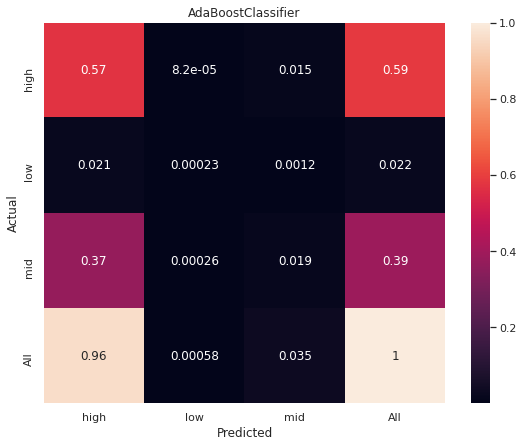


Trained AdaBoostClassifier in 50.97685408592224s


In [30]:
clf = fit_model(algorithm=abc, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [31]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier', AdaBoostClassifier())])

## Linear SVC

In [28]:
lsvc = LinearSVC(verbose=1)


Started Training LinearSVC on X_train: (291656, 6) y_train: (291656,)
[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Evaluating model on X_test: (72914, 6) y_test: (72914,)

Classification Report for LinearSVC
              precision    recall  f1-score   support

         low       0.06      0.01      0.02      1603
         mid       0.49      0.35      0.41     28483
        high       0.63      0.76      0.69     42828

    accuracy                           0.59     72914
   macro avg       0.39      0.38      0.37     72914
weighted avg       0.56      0.59      0.57     72914


Accuracy Score: 0.5862660120141536
Balanced Accuracy Score: 0.3763315404262985



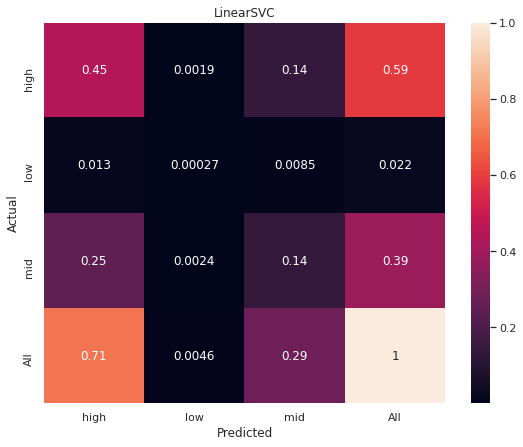


Trained LinearSVC in 199.0021414756775s


In [29]:
clf = fit_model(algorithm=lsvc, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [30]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier', LinearSVC(verbose=1))])

## MLP Classifier

In [26]:
mlp = MLPClassifier(alpha=0.001, max_iter=1, verbose=1)


Started Training MLPClassifier on X_train: (291656, 6) y_train: (291656,)
Iteration 1, loss = 0.75835927

Evaluating model on X_test: (72914, 6) y_test: (72914,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Classification Report for MLPClassifier
              precision    recall  f1-score   support

         low       1.00      0.00      0.00      1603
         mid       0.53      0.31      0.39     28483
        high       0.63      0.83      0.72     42828

    accuracy                           0.61     72914
   macro avg       0.72      0.38      0.37     72914
weighted avg       0.60      0.61      0.57     72914


Accuracy Score: 0.6084153934772472
Balanced Accuracy Score: 0.3799475125685053



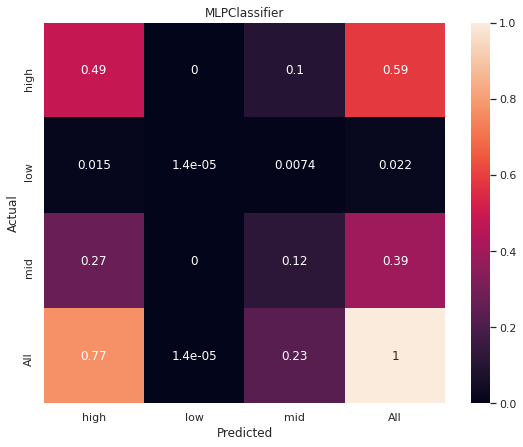


Trained MLPClassifier in 630.3555474281311s


In [27]:
clf = fit_model(algorithm=mlp, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [19]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 MLPClassifier(alpha=0.001, max_iter=2, verbose=1))])

## RandomForest Classifier

In [23]:
rfc = RandomForestClassifier(max_depth=50, verbose=1, n_jobs=-1)


Started Training RandomForestClassifier on X_train: (291656, 6) y_train: (291656,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.8min finished



Evaluating model on X_test: (72914, 6) y_test: (72914,)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished



Classification Report for RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         low       0.00      0.00      0.00      1603
         mid       0.64      0.00      0.00     28483
        high       0.59      1.00      0.74     42828

    accuracy                           0.59     72914
   macro avg       0.41      0.33      0.25     72914
weighted avg       0.60      0.59      0.44     72914


Accuracy Score: 0.5876786351043696
Balanced Accuracy Score: 0.33361039593376624



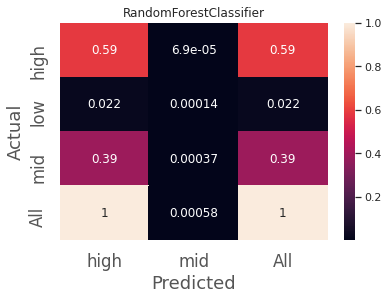


Trained RandomForestClassifier in 537.0094470977783s


In [24]:
clf = fit_model(algorithm=rfc, data=(X_train, X_test, y_train, y_test), preprocessor=preprocessor)

In [25]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=50, n_jobs=-1, verbose=1))])

## Comparing Scalers

- StandardScaler
- MinMaxScaler
- RobustScaler
- MaxAbsScaler
- PowerTransformer
- QuantileTransformer
- Normalizer

In [43]:
from time import time

def fit_model_unscaled(algorithm, data):
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    t1 = time()

    X_train, X_test, y_train, y_test = data

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', algorithm)])
    
    
    # train the model
    clf.fit(X_train, y_train)

    # test the model
    y_true = y_test.copy()
    y_pred = clf.predict(X_test)

    # get the classification report
    print(f"\nClassification Report for {algorithm.__class__.__name__} Unscaled")
    print(classification_report(y_true, y_pred, target_names=target_names, labels=target_names))

    acc_score = accuracy_score(y_true, y_pred)
    bal_score = balanced_accuracy_score(y_true, y_pred)
    
    print(f"\nAccuracy Score: {acc_score}")
    print(f"Balanced Accuracy Score: {bal_score}")

    print()

    t2 = time()

    print(f'Trained {algorithm.__class__.__name__} in {(t2 - t1)}s')

    return clf

In [25]:
from time import time

def fit_model_scaler(algorithm, data, scaler):

    numeric_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', scaler)]
        )

    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    t1 = time()

    X_train, X_test, y_train, y_test = data

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', algorithm)])
    
    
    # train the model
    clf.fit(X_train, y_train)

    # test the model
    y_true = y_test.copy()
    y_pred = clf.predict(X_test)

    # get the classification report
    print(f"\nClassification Report for {algorithm.__class__.__name__} with {scaler.__class__.__name__}")
    print(classification_report(y_true, y_pred, target_names=target_names, labels=target_names))

    acc_score = accuracy_score(y_true, y_pred)
    bal_score = balanced_accuracy_score(y_true, y_pred)
    
    print(f"\nAccuracy Score: {acc_score}")
    print(f"Balanced Accuracy Score: {bal_score}")

    print()

    t2 = time()

    print(f'Trained {algorithm.__class__.__name__} in {(t2 - t1)}s')

    return clf

In [26]:
algo = PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1)

### Standard Scaler

In [27]:
std_scaler = StandardScaler()

In [28]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=std_scaler)


Classification Report for PassiveAggressiveClassifier with StandardScaler
              precision    recall  f1-score   support

         low       0.06      0.06      0.06      1603
         mid       0.46      0.36      0.40     28483
        high       0.62      0.72      0.67     42828

    accuracy                           0.56     72914
   macro avg       0.38      0.38      0.38     72914
weighted avg       0.55      0.56      0.55     72914


Accuracy Score: 0.5615656801163014
Balanced Accuracy Score: 0.3785619997072959

Trained PassiveAggressiveClassifier in 7.8669610023498535s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### MinMax Scaler

In [29]:
minmax_scaler =  MinMaxScaler()

In [30]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=minmax_scaler)


Classification Report for PassiveAggressiveClassifier with MinMaxScaler
              precision    recall  f1-score   support

         low       0.05      0.00      0.01      1603
         mid       0.44      0.55      0.49     28483
        high       0.64      0.55      0.59     42828

    accuracy                           0.54     72914
   macro avg       0.37      0.37      0.36     72914
weighted avg       0.55      0.54      0.54     72914


Accuracy Score: 0.5409249252544093
Balanced Accuracy Score: 0.3694473636392875

Trained PassiveAggressiveClassifier in 7.548543214797974s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### MaxAbs Scaler

In [31]:
maxabs_scaler = MaxAbsScaler()

In [32]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=maxabs_scaler)


Classification Report for PassiveAggressiveClassifier with MaxAbsScaler
              precision    recall  f1-score   support

         low       0.07      0.01      0.02      1603
         mid       0.49      0.19      0.27     28483
        high       0.61      0.87      0.72     42828

    accuracy                           0.59     72914
   macro avg       0.39      0.36      0.34     72914
weighted avg       0.55      0.59      0.53     72914


Accuracy Score: 0.5882820857448501
Balanced Accuracy Score: 0.3598257153815126

Trained PassiveAggressiveClassifier in 7.605406761169434s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### Robust Scaler

In [33]:
robust_scaler = RobustScaler(quantile_range=(25, 75))

In [34]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=robust_scaler)


Classification Report for PassiveAggressiveClassifier with RobustScaler
              precision    recall  f1-score   support

         low       0.08      0.03      0.05      1603
         mid       0.47      0.26      0.33     28483
        high       0.61      0.81      0.70     42828

    accuracy                           0.58     72914
   macro avg       0.39      0.37      0.36     72914
weighted avg       0.54      0.58      0.54     72914


Accuracy Score: 0.5769811010231232
Balanced Accuracy Score: 0.36651556542661007

Trained PassiveAggressiveClassifier in 7.649526119232178s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler(quantile_range=(25,
                                                                                                75)))]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### PowerTransform (Yeo-Johnson)

In [35]:
power_trans = PowerTransformer(method='yeo-johnson')

In [36]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=power_trans)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)



Classification Report for PassiveAggressiveClassifier with PowerTransformer
              precision    recall  f1-score   support

         low       0.06      0.04      0.05      1603
         mid       0.43      0.58      0.50     28483
        high       0.64      0.51      0.57     42828

    accuracy                           0.53     72914
   macro avg       0.38      0.37      0.37     72914
weighted avg       0.55      0.53      0.53     72914


Accuracy Score: 0.5252214938146309
Balanced Accuracy Score: 0.37488500156296717

Trained PassiveAggressiveClassifier in 10.008253574371338s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### Quantile Transform

In [37]:
quant_trans = QuantileTransformer(output_distribution='normal')

In [38]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=quant_trans)


Classification Report for PassiveAggressiveClassifier with QuantileTransformer
              precision    recall  f1-score   support

         low       0.08      0.03      0.05      1603
         mid       0.43      0.59      0.50     28483
        high       0.64      0.49      0.56     42828

    accuracy                           0.52     72914
   macro avg       0.38      0.37      0.37     72914
weighted avg       0.54      0.52      0.52     72914


Accuracy Score: 0.5197492936884549
Balanced Accuracy Score: 0.37149925184802246

Trained PassiveAggressiveClassifier in 8.048646688461304s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### Normalizer (L2)

In [39]:
norm_scaler = Normalizer()

In [40]:
fit_model_scaler(algo, data=(X_train, X_test, y_train, y_test), scaler=norm_scaler)


Classification Report for PassiveAggressiveClassifier with Normalizer
              precision    recall  f1-score   support

         low       0.05      0.03      0.04      1603
         mid       0.46      0.30      0.36     28483
        high       0.62      0.77      0.69     42828

    accuracy                           0.57     72914
   macro avg       0.38      0.37      0.36     72914
weighted avg       0.54      0.57      0.55     72914


Accuracy Score: 0.5706722988726445
Balanced Accuracy Score: 0.36646952962846085

Trained PassiveAggressiveClassifier in 8.04029631614685s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   Normalizer())]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])

### Unscaled

In [44]:
fit_model_unscaled(algo, data=(X_train, X_test, y_train, y_test))


Classification Report for PassiveAggressiveClassifier Unscaled
              precision    recall  f1-score   support

         low       0.09      0.02      0.03      1603
         mid       0.48      0.24      0.32     28483
        high       0.61      0.83      0.70     42828

    accuracy                           0.58     72914
   macro avg       0.39      0.36      0.35     72914
weighted avg       0.55      0.58      0.54     72914


Accuracy Score: 0.5831938996626163
Balanced Accuracy Score: 0.36462720452376884

Trained PassiveAggressiveClassifier in 7.465895652770996s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier',
                 PassiveAggressiveClassifier(early_stopping=True, n_jobs=-1))])